**OBJECTIVES**


*    Analyse medical insurance costs based on various factors such as age, gender, BMI, number of dependents, smoking habits, and residential region.
*   Explore the “Medical Cost Personal Datasets” to uncover patterns of 1,338 people recorded in the data



In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Below I created bins of the BMI groups to categorize each person with the BMI they have

In [3]:
bins = [0, 18.5, 24.9, 29.9, 39.99, float('inf')]
labels = ['Underweight', 'Normal', 'Overweight', 'Obesity', 'Extreme Obesity']

df['BMI_Category'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=False)
df.head()

,age,sex,bmi,children,smoker,region,charges,BMI_Category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obesity
2,28,male,33.000,3,no,southeast,4449.46200,Obesity
3,33,male,22.705,0,no,northwest,21984.47061,Normal
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


Below I created age bins, and then I did a grouped count for the number of people within each age bin and each BMI Categories. The data shows in each age bin a large percentage are Obese, and this count number goes up in each age bin.

In [4]:
bins = [10, 20, 30, 40, 50, 60, 70, float('inf')]
df['Age_Bin'] = pd.cut(df['age'], bins=bins, right=False)

age_bmi = df.groupby(['Age_Bin','BMI_Category'], observed=True).size()

print(age_bmi)

Age_Bin       BMI_Category   
[10.0, 20.0)  Underweight          4
              Normal              28
              Overweight          35
              Obesity             61
              Extreme Obesity      9
[20.0, 30.0)  Underweight          7
              Normal              57
              Overweight          78
              Obesity            124
              Extreme Obesity     14
[30.0, 40.0)  Underweight          5
              Normal              45
              Overweight          81
              Obesity            107
              Extreme Obesity     19
[40.0, 50.0)  Normal              43
              Overweight          88
              Obesity            128
              Extreme Obesity     20
[50.0, 60.0)  Underweight          3
              Normal              35
              Overweight          72
              Obesity            137
              Extreme Obesity     24
[60.0, 70.0)  Underweight          1
              Normal              14
        

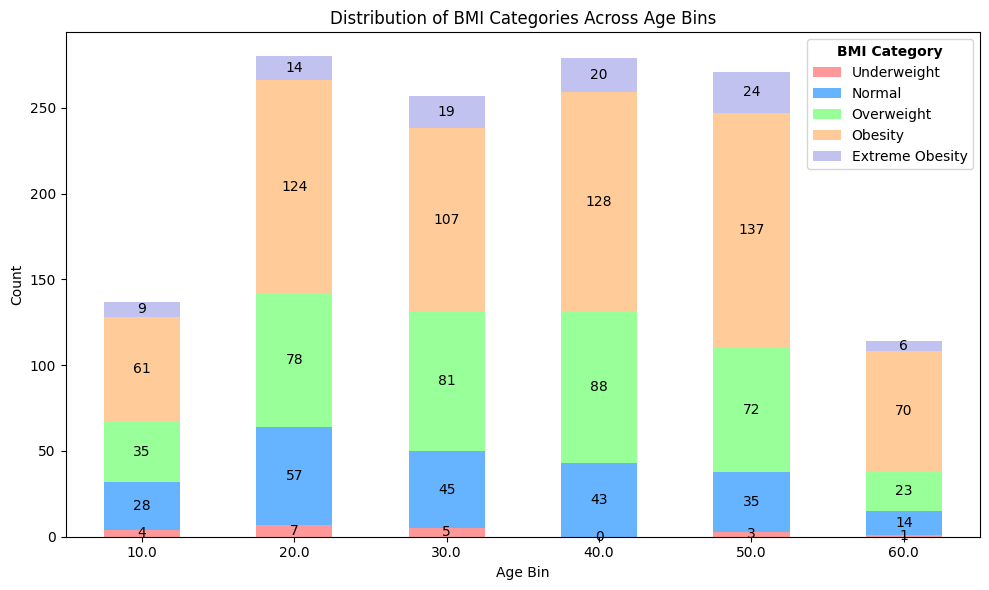

In [45]:
age_bmi = df.groupby(['Age_Bin', 'BMI_Category'], observed=True).size().unstack()

ax = age_bmi.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'])

ax.set_xticklabels([label.left for label in age_bmi.index], rotation=0)

for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%d')

plt.xlabel('Age Bin')
plt.ylabel('Count')
plt.title('Distribution of BMI Categories Across Age Bins')
plt.legend(title='BMI Category', title_fontproperties={'weight':'bold'})

plt.tight_layout()

plt.show()

Below I did a grouped count for the BMI Categories and the sum of all charges per category. The data shows that people who fall into the Obese category have the highest insurance costs. The people with the lowest are those that underweight and of a normal weight

In [21]:
max_charges_per_bmi = df.groupby('BMI_Category', observed=True)['charges'].sum()
print(max_charges_per_bmi.apply(lambda x: f'{x:,.2f}'))

BMI_Category
Underweight          177,044.01
Normal             2,304,248.94
Overweight         4,158,435.05
Obesity            9,578,992.30
Extreme Obesity    1,537,104.68
Name: charges, dtype: object


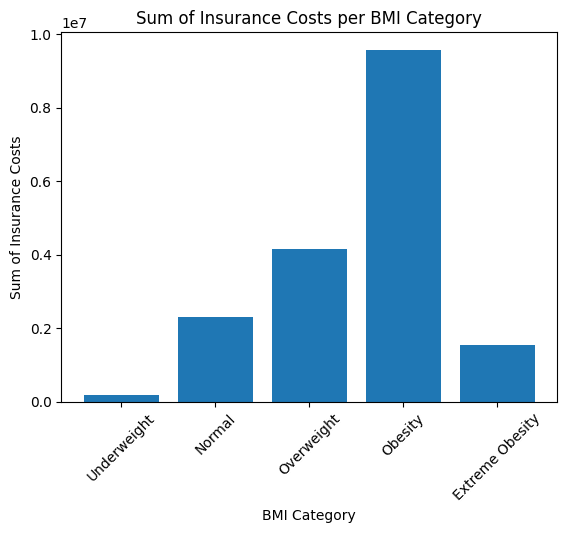

In [22]:
plt.bar(max_charges_per_bmi.index, max_charges_per_bmi.values)

plt.xlabel('BMI Category')
plt.ylabel('Sum of Insurance Costs')
plt.title('Sum of Insurance Costs per BMI Category')

plt.xticks(rotation=45)

plt.show()

Below I am changing the smoker and sex data to be binary

In [6]:
df["smoker"] = df['smoker'].replace({'no': 0, 'yes': 1}).astype(int)
df["sex"] = df['sex'].replace({'male': 0, 'female': 1}).astype(int)

Below I did a grouped count for the BMI Categories and the number of smokers - I made sure to only include the data where smoker = 1 (yes). The data shows that the majority of Smokers are in the Obese category - showing they are not only unhealthy from Smoking but also from their weight

In [7]:
bmi_smoker = df[df['smoker'] == 1].groupby('BMI_Category', observed=True)['smoker'].count()
print(bmi_smoker)

BMI_Category
Underweight          5
Normal              50
Overweight          72
Obesity            126
Extreme Obesity     21
Name: smoker, dtype: int64


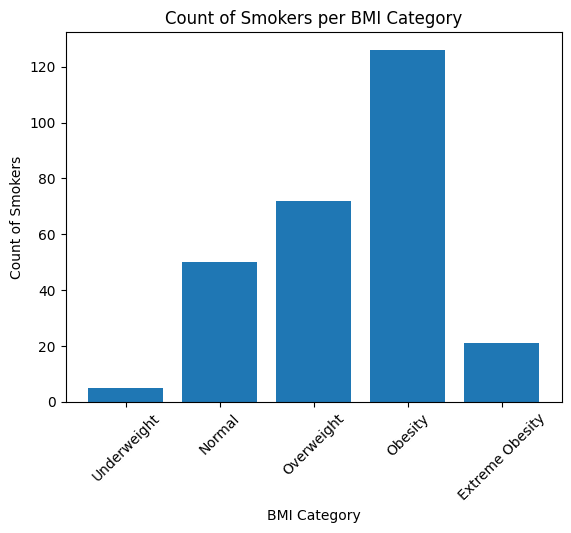

In [17]:
plt.bar(bmi_smoker.index, bmi_smoker.values)

plt.xlabel('BMI Category')
plt.ylabel('Count of Smokers')
plt.title('Count of Smokers per BMI Category')

plt.xticks(rotation=45)

plt.show()

Below the data shows that most of the people in the dataset are non-smokers

In [12]:
smoker_gender = df.groupby('smoker', observed=True)['sex'].count()
print(smoker_gender)

smoker
0    1064
1     274
Name: sex, dtype: int64


Below it shows that the total charges for smokers and non-smokers is very similar, and it is actually non-smokers that have the higher medical costs

In [9]:
smoker_charges = df.groupby('smoker', observed=True)['charges'].sum()
print(smoker_charges.apply(lambda x: f'${x:,.2f}'))

smoker
0    $8,974,061.47
1    $8,781,763.52
Name: charges, dtype: object


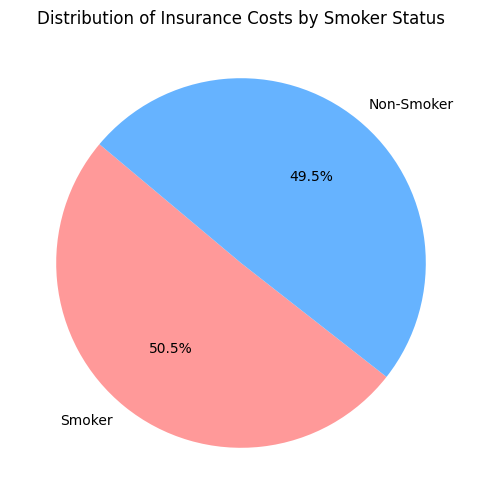

In [26]:
plt.figure(figsize=(6, 6))
plt.pie(smoker_charges.values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])

plt.title('Distribution of Insurance Costs by Smoker Status')
labels = smoker_charges.index.map({0: 'Non-Smoker', 1: 'Smoker'})

plt.show()

**CONCLUSION**

After going through the data and finding the trends I have found that the majority of people that have higher Medical Insurance costs are Overweight and Obese. I also found that in every age group the majority in each were obese, and this figure went up from one age group to the next.